# OT tutorial

In [1]:
import numpy as np
import ot

In [2]:
from io import BytesIO
import requests

data_url = 'https://github.com/PythonOT/POT/raw/master/data/manhattan.npz'
r = requests.get(data_url, stream=True)

In [3]:
data = np.load(BytesIO(r.raw.read()))
bakery_pos = data['bakery_pos']
bakery_prod = data['bakery_prod']
cafe_pos = data['cafe_pos']
cafe_prod = data['cafe_prod']
Imap = data['Imap']
print('Bakery production: {}'.format(bakery_prod))
print('Cafe sale: {}'.format(cafe_prod))
print('Total croissants : {}'.format(cafe_prod.sum()))

Bakery production: [31. 48. 82. 30. 40. 48. 89. 73.]
Cafe sale: [82. 88. 92. 88. 91.]
Total croissants : 441.0


In [4]:
bakery_pos.shape, bakery_prod.shape

((8, 2), (8,))

In [5]:
cafe_pos.shape, cafe_prod.shape

((5, 2), (5,))

In [6]:
M = ot.dist(bakery_pos, cafe_pos)

In [7]:
M.shape

(8, 5)

In [8]:
gamma_emd = ot.emd(bakery_prod, cafe_prod, M)

In [9]:
gamma_emd.shape

(8, 5)

In [10]:
reg = 0.1
K = np.exp(-M / M.max() / reg)
nit = 100
u = np.ones((len(bakery_prod), ))
for i in range(1, nit):
    v = cafe_prod / np.dot(K.T, u)
    u = bakery_prod / (np.dot(K, v))
gamma_sink_algo = np.atleast_2d(u).T * (K * v.T)  # Equivalent to np.dot(np.diag(u), np.dot(K, np.diag(v)))

In [11]:
gamma_sink_algo.shape

(8, 5)

In [12]:
gamma_sinkhorn = ot.sinkhorn(bakery_prod, cafe_prod, reg=reg, M=M/M.max())

In [13]:
gamma_sinkhorn.shape

(8, 5)

In [38]:
import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

In [94]:
n = 5  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

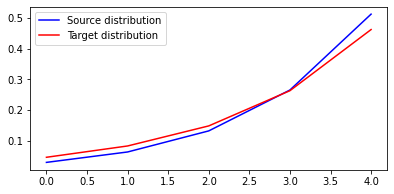

In [95]:
pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

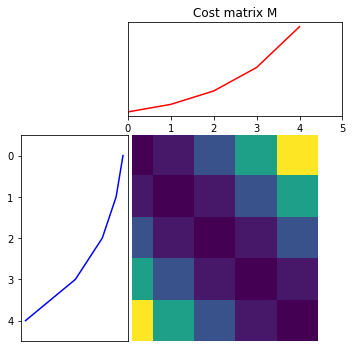

In [96]:
pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

It.  |Err         
-------------------
    0|5.881712e-02|
   10|5.881712e-02|
   20|5.881712e-02|
   30|5.881712e-02|
   40|5.881712e-02|
   50|5.881712e-02|
   60|5.881712e-02|
   70|5.881712e-02|
   80|5.881712e-02|
   90|5.881712e-02|
  100|5.881712e-02|
  110|5.881712e-02|
  120|5.881712e-02|
  130|5.881712e-02|
  140|5.881712e-02|
  150|5.881712e-02|
  160|5.881712e-02|
  170|5.881712e-02|
  180|5.881712e-02|
  190|5.881712e-02|
It.  |Err         
-------------------
  200|5.881712e-02|
  210|5.881712e-02|
  220|5.881712e-02|
  230|5.881712e-02|
  240|5.881712e-02|
  250|5.881712e-02|
  260|5.881713e-02|
  270|5.881713e-02|
  280|5.881716e-02|
  290|5.881737e-02|
  300|5.881870e-02|
  310|5.882725e-02|
  320|5.888012e-02|
  330|5.905751e-02|
  340|5.919978e-02|
  350|5.922981e-02|
  360|5.918814e-02|
  370|5.912321e-02|
  380|5.969839e-02|
  390|6.019823e-02|
It.  |Err         
-------------------
  400|6.034950e-02|
  410|6.036419e-02|
  420|6.018489e-02|
  430|5.892597e-02|
  4

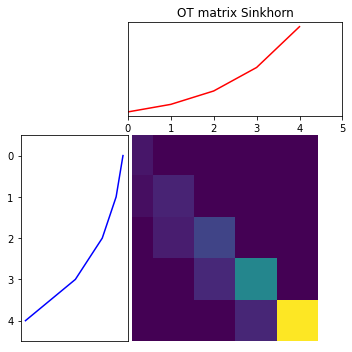

In [97]:
lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

pl.show()

In [98]:
G0 = ot.emd_1d(x, x, a, b)

In [99]:
G0

array([[0.02875604, 0.        , 0.        , 0.        , 0.        ],
       [0.01664376, 0.04608674, 0.        , 0.        , 0.        ],
       [0.        , 0.0362245 , 0.09525459, 0.        , 0.        ],
       [0.        , 0.        , 0.05249336, 0.21227303, 0.        ],
       [0.        , 0.        , 0.        , 0.05029436, 0.46197361]])

In [100]:
Gs.round(8)

array([[0.02875604, 0.        , 0.        , 0.        , 0.        ],
       [0.01664376, 0.04608674, 0.        , 0.        , 0.        ],
       [0.        , 0.0362245 , 0.09525459, 0.        , 0.        ],
       [0.        , 0.        , 0.05249336, 0.21227303, 0.        ],
       [0.        , 0.        , 0.        , 0.05029436, 0.46197361]])

In [101]:
a.shape

(5,)

In [102]:
b.shape

(5,)

In [128]:
a

array([0.02875604, 0.06273051, 0.1314791 , 0.26476638, 0.51226797])

In [129]:
b

array([0.0453998 , 0.08231125, 0.14774795, 0.26256739, 0.46197361])

In [143]:
ot_sh = ot.da.SinkhornTransport().fit(Xs=a.reshape(-1, 1), Xt=b.reshape(-1, 1))

In [144]:
ot_sh.coupling_

array([[0.04211326, 0.04161012, 0.04071661, 0.0391454 , 0.03641461],
       [0.04169299, 0.04129832, 0.04059158, 0.03933086, 0.03708625],
       [0.04084269, 0.04066192, 0.04032729, 0.03969656, 0.03847155],
       [0.0391961 , 0.03940848, 0.03977192, 0.0403667 , 0.04125681],
       [0.03615497, 0.03702115, 0.03859261, 0.04146049, 0.04677078]])

In [145]:
ot_sh.coupling_ @ a

array([0.03819304, 0.03853812, 0.03924547, 0.0406507 , 0.04337267])

In [135]:
ot_sh.transform(a.reshape(-1, 1))

array([[0.0453998 ],
       [0.08231125],
       [0.14774795],
       [0.26256739],
       [0.46197361]])

# Prototyping

In [1]:
import math
import torch
import ot

In [2]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
N = 5; D = 768

In [4]:
G = torch.randn(N + 1, D)

In [5]:
G_viz = TSNE(init='pca').fit_transform(G)

/home/vaseline555/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/vaseline555/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


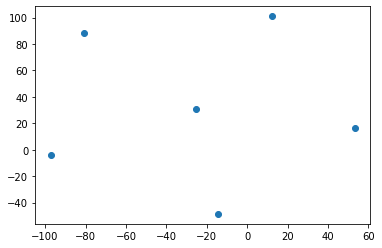

In [6]:
plt.scatter(G_viz[:, 0], G_viz[:, 1])
plt.show()

In [7]:
U = torch.nn.functional.pad(torch.eye(N), (0, 0, 0, D - N), mode='constant')

In [8]:
U.shape

torch.Size([768, 5])

In [9]:
u_list = []
for i in range(N // 2):
    alpha = torch.randint(low=0, high=360, size=(1,))
    angle_to_radian = torch.tensor(math.pi / 180)
    s = torch.sin(alpha * angle_to_radian)
    c = torch.cos(alpha * angle_to_radian)
    rot = torch.tensor([[c, -s], [s, c]])
    u_list.append(rot)
else:
    if N % 2 == 1:
        u_list.append(torch.tensor([1]))
    U = torch.block_diag(*u_list)
    U = torch.nn.functional.pad(U, (0, 0, 0, D - N), mode='constant')

In [10]:
U

tensor([[ 0.8290,  0.5592,  0.0000,  0.0000,  0.0000],
        [-0.5592,  0.8290,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.8387, -0.5446,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000]])

In [11]:
U.T @ U

tensor([[ 1.0000e+00,  1.4693e-08,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 1.4693e-08,  1.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0000e+00, -1.1267e-08,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.1267e-08,  1.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00]])

In [12]:
M = (torch.eye(N) - (torch.ones(N, 1) @ torch.ones(1, N)).div(N)).mul(math.sqrt(N / (N - 1))) @ U.T

In [13]:
M.shape

torch.Size([5, 768])

In [14]:
G_tilde = torch.cat([torch.zeros(1, D), M], dim=0)

In [15]:
G

tensor([[-0.0510, -1.1968, -0.0669,  ...,  0.6535, -0.1063,  0.2504],
        [ 1.2356,  0.7037,  0.7355,  ..., -1.2438,  0.2437, -0.8877],
        [-0.0240,  0.0736,  1.6822,  ..., -2.5162, -1.1250,  0.0482],
        [ 1.0883, -1.3388,  1.7169,  ...,  0.5536,  1.1363, -1.1384],
        [ 0.8082, -0.5487,  1.0498,  ...,  0.1539, -0.9903,  0.2566],
        [ 0.2579, -0.1429,  0.2355,  ...,  1.5966,  0.6731, -1.2534]])

In [16]:
G_tilde

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.6165, -0.6855, -0.0657,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.3148,  0.8666, -0.0657,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3104, -0.0603,  0.8719,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3104, -0.0603, -0.6747,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3104, -0.0603, -0.0657,  ...,  0.0000,  0.0000,  0.0000]])

In [17]:
ot_sh = ot.da.EMDTransport().fit(
    Xs=G,
    ys=torch.arange(N + 1), 
    Xt=G_tilde,
    yt=torch.arange(N + 1)
)

In [19]:
ot_sh.transform(G)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.6165, -0.6855, -0.0657,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.3148,  0.8666, -0.0657,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3104, -0.0603,  0.8719,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3104, -0.0603, -0.6747,  ...,  0.0000,  0.0000,  0.0000],
        [-0.3104, -0.0603, -0.0657,  ...,  0.0000,  0.0000,  0.0000]])

In [29]:
G_viz = TSNE(init='pca').fit_transform(G_tilde)

/home/vaseline555/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/vaseline555/miniconda3/envs/deep/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


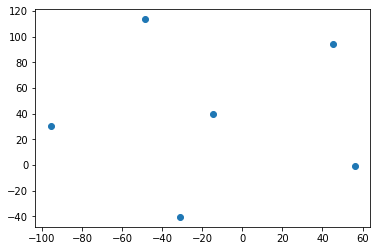

In [30]:
plt.scatter(G_viz[:, 0], G_viz[:, 1])
plt.show()

In [98]:
T = torch.linalg.lstsq(G, G_tilde)[0].T

In [99]:
T @ G[1]

tensor([ 0.8944, -0.2236, -0.2236, -0.2236, -0.2236,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.00

In [100]:
G_tilde[1]

tensor([ 0.8944, -0.2236, -0.2236, -0.2236, -0.2236,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.00